In [2]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import csv
print("Setup Complete")

Setup Complete


In [10]:
data_csv = pd.read_csv('data_with_name.csv')

In [11]:
# xem tỷ lệ giao dịch có tên và không có tên 
total_transaction = data_csv.shape[0]
total_transaction_with_name = data_csv[data_csv['Name'] != 'unknown'].shape[0]
total_transaction_without_name = data_csv[data_csv['Name'] == 'unknown'].shape[0]

print('Tổng số giao dịch: ', total_transaction)
print('Tổng số giao dịch có tên: ', total_transaction_with_name)
print('Tổng số giao dịch không có tên: ', total_transaction_without_name)
print('Tỷ lệ giao dịch có tên: ', round(total_transaction_with_name/total_transaction*100, 2) , '%')
print('Tỷ lệ giao dịch không có tên: ', round(100 - total_transaction_with_name/total_transaction*100, 2), '%')

Tổng số giao dịch:  2081426
Tổng số giao dịch có tên:  1637917
Tổng số giao dịch không có tên:  443509
Tỷ lệ giao dịch có tên:  78.69 %
Tỷ lệ giao dịch không có tên:  21.31 %


=> cho thấy phần lớn mọi người sẽ muốn thể hiện tên của mình, cty, ...

In [13]:
data_csv[data_csv['Name'] == 'unknown'].to_csv('test.csv', index=False)

In [ ]:
data_csv[data_csv['Name'] != 'unknown'].to_csv('test.csv', index=False)

In [4]:
# dùng biểu đồ boxplot dể xem phân phối của số tiền giao dịch có tên và không có tên
data_csv['isKnown'] = data_csv['Name'].apply(lambda x: 'unknown' if x == 'unknown' else 'known')
data_csv['Log10Amount'] = data_csv['Amount'].apply(lambda x: np.log10(x))

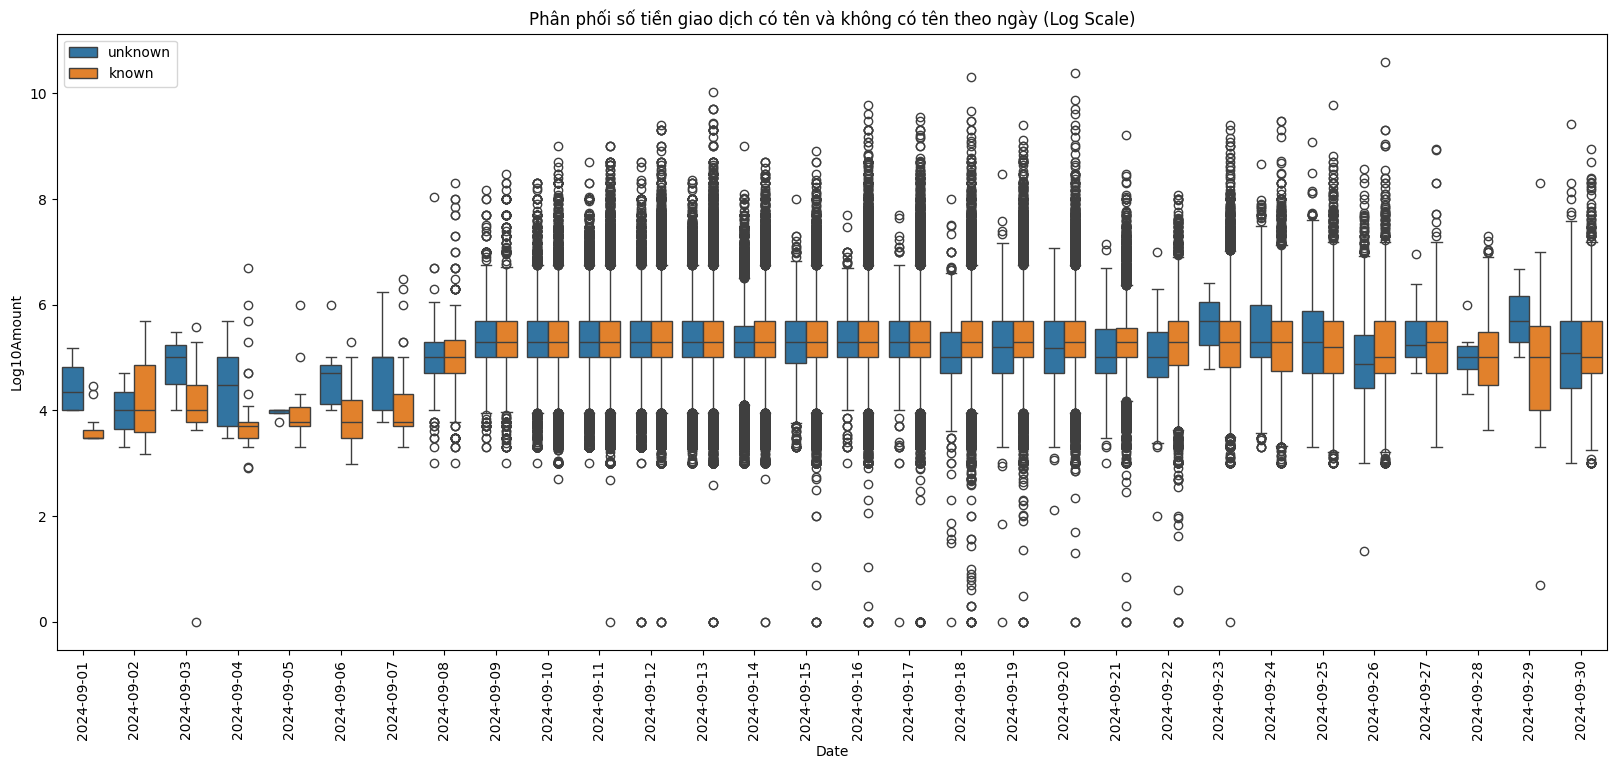

In [5]:
# Plotting the boxplot with a logarithmic scale
plt.figure(figsize=(20, 8))
sns.boxplot(x='Date', y='Log10Amount', hue='isKnown', data=data_csv)
# plt.yscale('log')
plt.title('Phân phối số tiền giao dịch có tên và không có tên theo ngày (Log Scale)')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()


ngày 12 công khai sao kê
bão 7-9
ngày 5 bắt đầu có thông tin về bão
ngày 7 bắt đầu ủng hộ

khoảng rất lớn 10^11 nên chuyển sang log10

cả known và unknown tương đối đều nhau về số tiền gửi 
known sẽ nhỉnh hơn về lượng tiền lớn vì các tập đoàn, cty sẽ muốn để tên mình

In [4]:
data_csv = pd.read_csv('data_with_processed_name.csv')

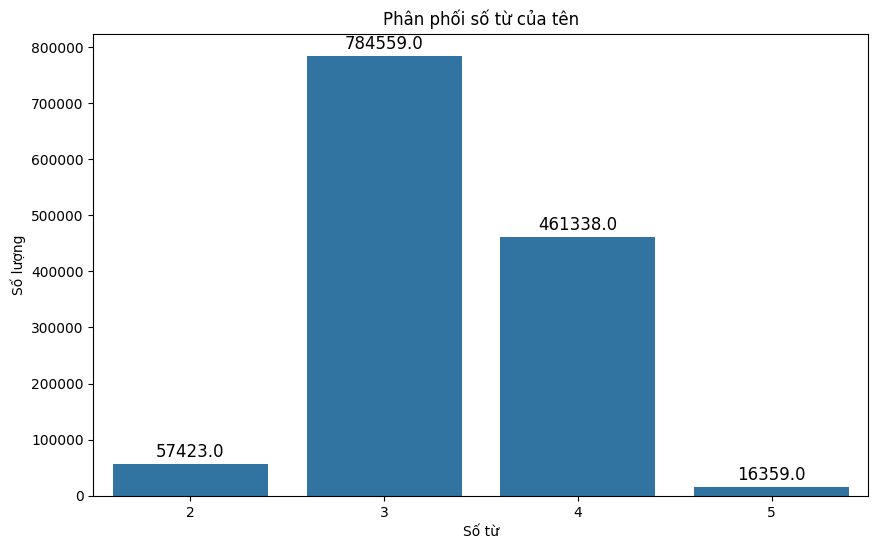

In [6]:
# đếm số từ của tên
data_csv['Count_Word_Name'] = data_csv['Name'].apply(lambda x: len(x.split()))

# Plot the distribution of word counts in names
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Count_Word_Name', data=data_csv)
plt.title('Phân phối số từ của tên')
plt.xlabel('Số từ')
plt.ylabel('Số lượng')

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()



In [7]:
# top 15 họ phổ biến nhất
data_csv['Surname'] = data_csv['Name'].apply(lambda x: x.split()[0])

# đếm số lần xuất hiện của mỗi họ
surname_counts = data_csv['Surname'].value_counts()
surname_counts[:15]

Surname
NGUYEN    393325
TRAN      118754
LE        108372
PHAM       78883
VU         38565
HOANG      35287
BUI        35016
DO         31686
PHAN       29364
VO         27021
DANG       25472
HUYNH      24177
NGO        22515
TRUONG     19912
DUONG      18111
Name: count, dtype: int64

so sánh với wiki
https://vi.wikipedia.org/wiki/H%E1%BB%8D_ng%C6%B0%E1%BB%9Di_Vi%E1%BB%87t_Nam

In [8]:
total_transaction = data_csv.shape[0]

# set các họ có count > 500
surname_counts = surname_counts[surname_counts > 2000]

# Tính tỷ lệ người có 2 họ
def has_two_surnames(name):
    l = name.split()
    a = l[1]
    if a in surname_counts:
        if len(l) > 3:
            return True
        else:
            return False
    return False

data_csv['HasTwoSurnames'] = data_csv['Name'].apply(has_two_surnames)
print('Số người có 1 họ: ', data_csv[data_csv['HasTwoSurnames'] == False].shape[0])
print('Số người có 2 họ: ', data_csv[data_csv['HasTwoSurnames'] == True].shape[0])
print('Tỷ lệ người có 2 họ: ', round(data_csv[data_csv['HasTwoSurnames'] == True].shape[0]/total_transaction*100, 2), '%')


Số người có 1 họ:  1225140
Số người có 2 họ:  94539
Tỷ lệ người có 2 họ:  7.16 %


=> đa số sẽ đặt tên theo họ của bố theo tập quán xưa
có những gia đình tư tưởng hiện đại hơn đặt tên theo cả họ bố và mẹ